## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  81.263261   633.550580  0.691294   2.927333   445.526148
1  48.731659  1138.611530  0.727184   8.033937   829.308006
2  12.559437   877.479244  0.207525  10.422670   182.530271
3  20.278933  1445.451191  0.077120   3.621508   113.281948
4  29.616233  1469.979515  0.691717   1.651800  1017.289155


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9644880	total: 58.2ms	remaining: 58.1s
1:	learn: 0.9516163	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9399664	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9284110	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9149222	total: 60.1ms	remaining: 12s
5:	learn: 0.9038518	total: 60.6ms	remaining: 10s
6:	learn: 0.8895001	total: 61.1ms	remaining: 8.67s
7:	learn: 0.8775932	total: 61.7ms	remaining: 7.64s
8:	learn: 0.8653953	total: 62ms	remaining: 6.83s
9:	learn: 0.8543662	total: 62.4ms	remaining: 6.18s
10:	learn: 0.8437510	total: 63ms	remaining: 5.66s
11:	learn: 0.8305593	total: 63.4ms	remaining: 5.22s
12:	learn: 0.8195069	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8071016	total: 64.4ms	remaining: 4.54s
14:	learn: 0.7953380	total: 64.9ms	remaining: 4.26s
15:	learn: 0.7860153	total: 65.3ms	remaining: 4.01s
16:	learn: 0.7748332	total: 65.6ms	remaining: 3.79s
17:	learn: 0.7663918	total: 66ms	remaining: 3.6s
18:	learn: 0.7589735	total: 66.5ms	remaining: 3.43s
19:

116:	learn: 0.2380000	total: 107ms	remaining: 809ms
117:	learn: 0.2355962	total: 108ms	remaining: 805ms
118:	learn: 0.2333238	total: 108ms	remaining: 802ms
119:	learn: 0.2309180	total: 109ms	remaining: 797ms
120:	learn: 0.2283777	total: 109ms	remaining: 793ms
121:	learn: 0.2259974	total: 110ms	remaining: 788ms
122:	learn: 0.2232127	total: 110ms	remaining: 784ms
123:	learn: 0.2203838	total: 110ms	remaining: 780ms
124:	learn: 0.2181088	total: 111ms	remaining: 776ms
125:	learn: 0.2156580	total: 111ms	remaining: 773ms
126:	learn: 0.2128495	total: 112ms	remaining: 768ms
127:	learn: 0.2107589	total: 112ms	remaining: 764ms
128:	learn: 0.2087971	total: 112ms	remaining: 759ms
129:	learn: 0.2064729	total: 113ms	remaining: 755ms
130:	learn: 0.2046077	total: 113ms	remaining: 751ms
131:	learn: 0.2025770	total: 114ms	remaining: 747ms
132:	learn: 0.2008004	total: 114ms	remaining: 742ms
133:	learn: 0.1991068	total: 114ms	remaining: 739ms
134:	learn: 0.1968908	total: 115ms	remaining: 735ms
135:	learn: 

298:	learn: 0.0571409	total: 185ms	remaining: 434ms
299:	learn: 0.0569580	total: 186ms	remaining: 433ms
300:	learn: 0.0567787	total: 186ms	remaining: 432ms
301:	learn: 0.0565998	total: 187ms	remaining: 431ms
302:	learn: 0.0564531	total: 187ms	remaining: 430ms
303:	learn: 0.0562751	total: 187ms	remaining: 429ms
304:	learn: 0.0560941	total: 188ms	remaining: 428ms
305:	learn: 0.0558285	total: 188ms	remaining: 427ms
306:	learn: 0.0556862	total: 189ms	remaining: 426ms
307:	learn: 0.0555540	total: 189ms	remaining: 425ms
308:	learn: 0.0551000	total: 190ms	remaining: 424ms
309:	learn: 0.0549416	total: 190ms	remaining: 423ms
310:	learn: 0.0547603	total: 190ms	remaining: 422ms
311:	learn: 0.0546253	total: 191ms	remaining: 421ms
312:	learn: 0.0544666	total: 191ms	remaining: 419ms
313:	learn: 0.0540546	total: 192ms	remaining: 419ms
314:	learn: 0.0538073	total: 192ms	remaining: 418ms
315:	learn: 0.0536456	total: 192ms	remaining: 417ms
316:	learn: 0.0534902	total: 193ms	remaining: 415ms
317:	learn: 

544:	learn: 0.0248138	total: 288ms	remaining: 241ms
545:	learn: 0.0246991	total: 289ms	remaining: 240ms
546:	learn: 0.0246752	total: 289ms	remaining: 240ms
547:	learn: 0.0245319	total: 290ms	remaining: 239ms
548:	learn: 0.0244856	total: 290ms	remaining: 238ms
549:	learn: 0.0244094	total: 290ms	remaining: 238ms
550:	learn: 0.0243584	total: 291ms	remaining: 237ms
551:	learn: 0.0242844	total: 291ms	remaining: 236ms
552:	learn: 0.0241624	total: 292ms	remaining: 236ms
553:	learn: 0.0241423	total: 292ms	remaining: 235ms
554:	learn: 0.0240272	total: 292ms	remaining: 234ms
555:	learn: 0.0240119	total: 293ms	remaining: 234ms
556:	learn: 0.0238842	total: 293ms	remaining: 233ms
557:	learn: 0.0237793	total: 294ms	remaining: 232ms
558:	learn: 0.0236631	total: 294ms	remaining: 232ms
559:	learn: 0.0235614	total: 294ms	remaining: 231ms
560:	learn: 0.0235395	total: 295ms	remaining: 231ms
561:	learn: 0.0234270	total: 295ms	remaining: 230ms
562:	learn: 0.0233286	total: 296ms	remaining: 230ms
563:	learn: 

726:	learn: 0.0119045	total: 366ms	remaining: 138ms
727:	learn: 0.0118514	total: 367ms	remaining: 137ms
728:	learn: 0.0117962	total: 367ms	remaining: 137ms
729:	learn: 0.0117645	total: 368ms	remaining: 136ms
730:	learn: 0.0117129	total: 368ms	remaining: 136ms
731:	learn: 0.0116820	total: 369ms	remaining: 135ms
732:	learn: 0.0116315	total: 369ms	remaining: 134ms
733:	learn: 0.0115844	total: 370ms	remaining: 134ms
734:	learn: 0.0115269	total: 370ms	remaining: 133ms
735:	learn: 0.0114930	total: 370ms	remaining: 133ms
736:	learn: 0.0114369	total: 371ms	remaining: 132ms
737:	learn: 0.0113822	total: 371ms	remaining: 132ms
738:	learn: 0.0113526	total: 372ms	remaining: 131ms
739:	learn: 0.0113099	total: 372ms	remaining: 131ms
740:	learn: 0.0112773	total: 372ms	remaining: 130ms
741:	learn: 0.0112245	total: 373ms	remaining: 130ms
742:	learn: 0.0111926	total: 373ms	remaining: 129ms
743:	learn: 0.0111411	total: 374ms	remaining: 129ms
744:	learn: 0.0110879	total: 374ms	remaining: 128ms
745:	learn: 

896:	learn: 0.0073445	total: 440ms	remaining: 50.5ms
897:	learn: 0.0073149	total: 441ms	remaining: 50ms
898:	learn: 0.0072948	total: 441ms	remaining: 49.5ms
899:	learn: 0.0072798	total: 441ms	remaining: 49ms
900:	learn: 0.0072686	total: 442ms	remaining: 48.6ms
901:	learn: 0.0072540	total: 442ms	remaining: 48ms
902:	learn: 0.0072431	total: 443ms	remaining: 47.5ms
903:	learn: 0.0072232	total: 443ms	remaining: 47.1ms
904:	learn: 0.0072090	total: 443ms	remaining: 46.5ms
905:	learn: 0.0071983	total: 444ms	remaining: 46.1ms
906:	learn: 0.0071781	total: 444ms	remaining: 45.6ms
907:	learn: 0.0071668	total: 445ms	remaining: 45.1ms
908:	learn: 0.0071471	total: 445ms	remaining: 44.6ms
909:	learn: 0.0071366	total: 446ms	remaining: 44.1ms
910:	learn: 0.0071232	total: 446ms	remaining: 43.6ms
911:	learn: 0.0071096	total: 447ms	remaining: 43.1ms
912:	learn: 0.0070994	total: 447ms	remaining: 42.6ms
913:	learn: 0.0070919	total: 447ms	remaining: 42.1ms
914:	learn: 0.0070725	total: 448ms	remaining: 41.6ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

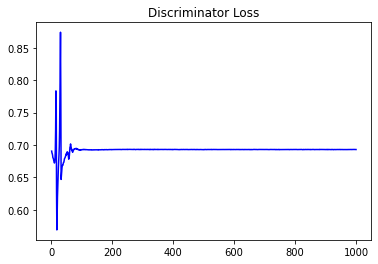

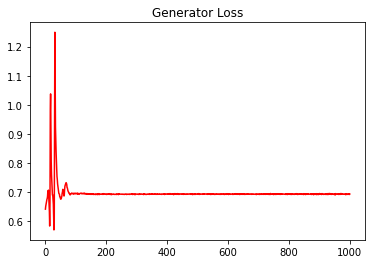

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.005810454769831574


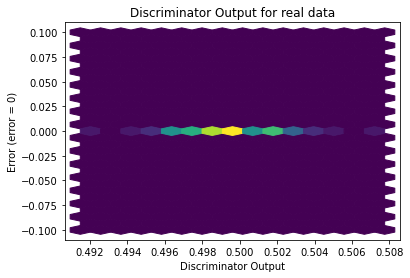

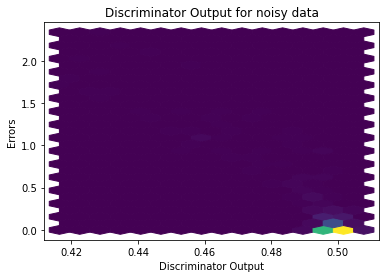

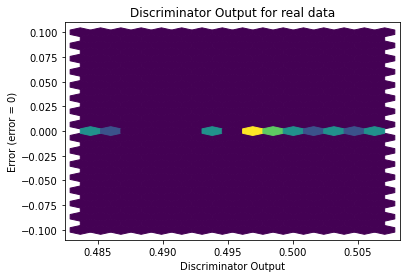

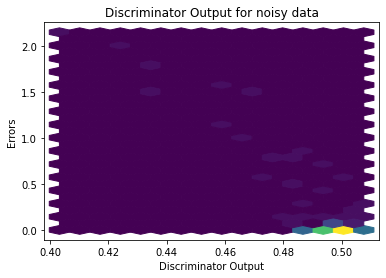

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


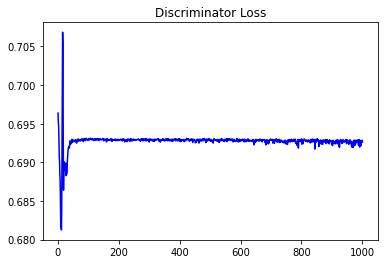

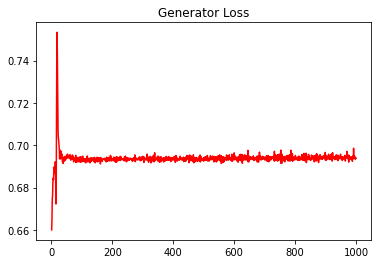

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0028688669650969527


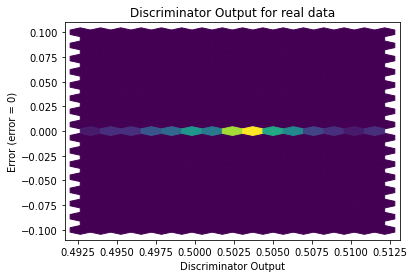

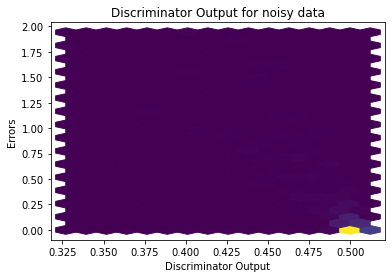

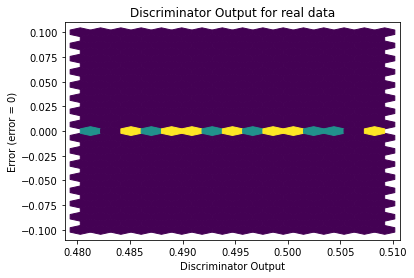

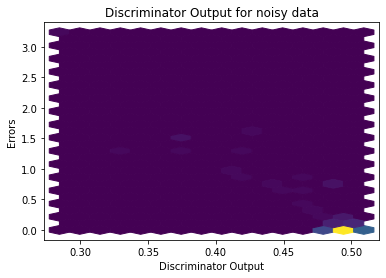

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6489]], requires_grad=True)
